**여기서부터는**

실제 동영상에서 뽑아온 R값, HSSC값을 통해 학습하는 것을 해본다.




우선 데이터를 불러와 30개씩 짤라서 출력해보자..

X_train 만드는 과정이다. 여기서 작업해야 할 부분은,
1. R값, HSSC값을 colab에 마운트한다.
2. 맨 위의 파일 이름만 수정하면 된다.

In [ ]:
# 각각 Ra값, HSSC값 텍스트 파일은 열어서 읽어온다.
with open("Rvalue (17).txt", "r") as f:
  rvalue = f.read();

with open("HSSCvalue (17).txt", "r") as f:
  hsscvalue = f.read();

# 이때, 값들은 모두 문자열이고 ','로 구분이 되어 있기 때문에 split을 진행.
rList = rvalue.split(',')
hsscList = hsscvalue.split(',')
newRList = []
newHsscList = []
print(len(rList))
print(len(hsscList))

for rl in rList:
  if rl[0] == '[':
    rl = rl[1:]
  if rl[len(rl)-1] == ']':
    rl = rl[:len(rl)-2]
  real = round(float(rl),3)
  newRList.append(real)

for hl in hsscList:
  if hl[0] == '[':
    hl = hl[1:]
  if hl[len(hl)-1] == ']':
    hl = hl[:len(hl)-2]
  if hl == '':
    hl = 0
  real = round(float(hl),3)
  newHsscList.append(real)

print(newRList)
print(newHsscList)

281
280
[0.334, 0.307, 0.342, 0.327, 0.32, 0.318, 0.327, 0.345, 0.378, 0.366, 0.333, 0.369, 0.4, 0.423, 0.448, 0.421, 0.418, 0.372, 0.428, 0.374, 0.52, 0.52, 0.521, 0.42, 0.461, 0.414, 0.414, 0.531, 0.454, 0.594, 0.527, 0.487, 0.487, 0.562, 0.562, 0.467, 0.532, 0.59, 0.529, 0.553, 0.608, 0.402, 0.581, 0.567, 0.664, 0.927, 0.833, 0.831, 0.953, 0.853, 0.54, 0.491, 0.479, 0.483, 0.468, 0.532, 0.566, 0.55, 0.883, 0.834, 0.967, 0.637, 1.051, 0.694, 0.594, 0.724, 0.798, 0.867, 0.872, 0.771, 0.798, 0.322, 0.65, 0.609, 0.839, 1.885, 0.866, 1.169, 1.172, 0.632, 0.714, 0.614, 0.82, 0.701, 0.16, 0.675, 0.602, 0.962, 0.789, 0.803, 0.504, 0.75, 0.642, 0.332, 0.485, 0.539, 0.27, 0.657, 0.251, 0.209, 0.382, 0.332, 0.332, 0.385, 0.385, 0.392, 0.453, 0.451, 0.467, 0.498, 0.455, 0.126, 0.125, 0.155, 0.161, 0.152, 0.132, 0.126, 0.128, 0.121, 0.121, 0.119, 0.117, 0.117, 0.153, 0.11, 0.17, 0.16, 0.121, 0.121, 0.47, 0.443, 0.165, 0.184, 0.571, 0.525, 0.525, 0.71, 0.732, 2.442, 0.561, 0.639, 1.08, 0.859, 1.0

이제 y_train을 만드는 과정

맨 위 코드는 사용하지 말고, 그 다음 셀 사용. 선택지 3가지 있음.

맨 위는 낙상 + 정상이 합쳐졌을 때 사용하는 것으로 낙상이 계속 되다가 정상으로 되거나 그 반대의 경우 한쪽은 np.ones(a frame), 다른 한쪽은 np.zeros(b frame)으로 한 뒤 연결시켜줌.

두 번째는 그냥 낙상만 쭉 or 정상만 쭉.

세 번쨰는 뒤죽박죽 섞여 있어서 직접 입력

In [ ]:
import numpy as np


# y_train data 입력(각 np.zeros(), np.ones()에 프레임 수 만큼 입력.모든 수의 합은 len(HsscList))
pre_fall = np.zeros(280)
fall = np.ones(0)
post_fall = np.zeros(0)
new_data = np.concatenate([pre_fall, fall, post_fall], axis=0)
for i in range(len(newHsscList)-30):
  y = new_data[i:i+30]
  y_train = np.load('y_train.npy')
  y_train = np.concatenate([y_train, y.reshape(1, -1)], axis=0)
  np.save('y_train.npy', y_train)


In [ ]:
import numpy as np

for i in range(len(newHsscList)-30):
  x1 = np.array(newRList[i:i+30])
  x2 = np.array(newHsscList[i:i+30])
  re_x1 = np.expand_dims(x1, axis=1)
  re_x2 = np.expand_dims(x2, axis=1)
  merged = np.concatenate((re_x1, re_x2), axis=1)
  x = np.expand_dims(merged, axis=0)
  X_train = np.load('X_train.npy')
  X_train = np.concatenate((X_train, x), axis = 0)
  np.save('X_train.npy', X_train)

진행상황 shape 확인.

매번 X_train, y_train을 만들 때마다 아래 셀 실행시켜 확인.

In [34]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
print(X_train.shape)
print(y_train.shape)

(4733, 30, 2)
(4733, 30)


이제 밑은 학습시키는 과정.

X_train shape: (3786, 30, 2)
X_test shape: (947, 30, 2)
y_train shape: (3786, 30)
y_test shape: (947, 30)


Epoch 1/100
237/237 [==============================] - 16s 11ms/step - loss: 0.2258 - accuracy: 0.9202 - val_loss: 0.1442 - val_accuracy: 0.9433
Epoch 2/100
237/237 [==============================] - 2s 8ms/step - loss: 0.1376 - accuracy: 0.9428 - val_loss: 0.1287 - val_accuracy: 0.9440
Epoch 3/100
237/237 [==============================] - 3s 11ms/step - loss: 0.1301 - accuracy: 0.9444 - val_loss: 0.1297 - val_accuracy: 0.9472
Epoch 4/100
237/237 [==============================] - 2s 8ms/step - loss: 0.1216 - accuracy: 0.9461 - val_loss: 0.1206 - val_accuracy: 0.9513
Epoch 5/100
237/237 [==============================] - 2s 8ms/step - loss: 0.1155 - accuracy: 0.9506 - val_loss: 0.1112 - val_accuracy: 0.9489
Epoch 6/100
237/237 [==============================] - 2s 8ms/step - loss: 0.1072 - accuracy: 0.9542 - val_loss: 0.1175 - val_accuracy: 0.9453
Epoch 7/100
237/237 [==============================] - 2s 8ms/step - loss: 0.1013 - accuracy: 0.9565 - val_loss: 0.1026 - val_accuracy: 0.9

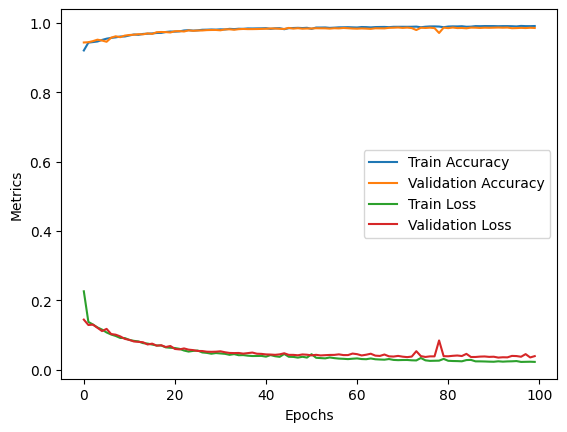

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# 시계열 데이터 생성
time_steps = 30

X = np.load('X_train.npy')

y = np.load('y_train.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

model = Sequential()

model.add(GRU(32, return_sequences=True, input_shape=(30, 2)))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size = 16, validation_data=(X_test, y_test))
print(X_train.shape, y_train.shape)
model.summary()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.show()

# test_loss, test_acc = model.evaluate(X_test, y_test)
# print('Test accuracy:', test_acc)

30/30 [==============================] - 0s 4ms/step
(947, 30, 1)
(947, 30)
total :  28410
3495 264 161 24490
정확도는 전체 예측 결과 중 올바르게 예측한 결과의 비율을 나타낸다.
정확도 = (tp + tn) / (tp + tn + fp + fn)
여기서는 ((실제낙상&낙상예측)+(정상상황&정상예측)) / (전체상황)
1. Accuracy :  98.50404787046814 %

정밀도는 예측한 Positive 클래스 중 실제로 Positive인 샘플의 비율을 나타낸다.
정밀도 = tp / (tp + fp)
여기서는 (실제낙상&낙상예측) / ((실제낙상&낙상예측)+(정상상황&낙상예측))
2. Precision :  95.59628008752735 %

재현율(=민감도, TPR)은 실제 Positive 샘플 중 예측한 Positive의 비율을 나타낸다.
재현율 = tp / (tp + fn)
여기서는 (실제낙상&낙상예측) / ((실제낙상*낙상예측)+(실제낙상&정상예측))
3. Recall :  92.97685554668796 %

특이도(Specificity, =TNR)은 실제 Negative인 샘플 중 예측한 Negative의 비율을 나타낸다.
특이도 = tn / (tn + fp)
여기서는 (정상상황&정상예측) / ((정상상황&정상예측)+(정상상황&낙상예측))
4. Specificity(TNR) :  99.3468824794126 %

F1-Score는 정밀도와 재현율의 조화평균으로 계산되는 지표로, 정밀도와 재현율의 균형을 나타낸다.
F1 스코어 = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)
5. F1-Score :  94.26837491571139 %

위양성율(FPR)은 실제로 Negative인 샘플 중 잘못 예측한 Positive의 비율을 나타낸다.
위양성율 = fp / (fp + tn)
여기서는 (정상상황&낙상예측) / ((정상상황&낙상예측)+(정상상황&정

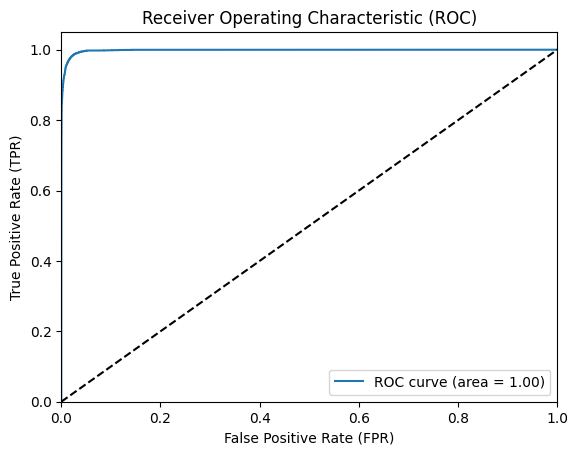

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

predictions = model.predict(X_test)

# print(predictions)

cnt = 0
tp = 0
tn = 0
fp = 0
fn = 0

# for i in predictions:
#   for j in i:
#     if j > 0.5:
#       cnt += 1
# print(cnt)

# for data in predictions:
#   fallFlag = False
#   for timestep in data:
#     if timestep > 0.5:
#       fallFlag = True
#   if fallFlag: cnt+=1
# print(cnt)

print(predictions.shape)
print(y_test.shape)


# for i in range(predictions.shape[0]):
#   fallFlag = False
#   for j in range(predictions.shape[1]):
#     if predictions[i][j] > 0.5:
#       fallFlag = True
#       if y_test[i][j] == 1:
#         tp += 1
#       else: tn += 1
#     else:
#       if y_test[i][j] == 1:
#         fp += 1
#       else: fn += 1
#   if fallFlag: cnt += 1
  
# print('Fall count : ', cnt)
# accuracy = (tp+tn) / (tp+tn+fp+fn)
# precision = (tp) / (tp+fp)
# recall = (tp) / (tp+fn)
# f1Score = 2*(precision*recall) / (precision + recall)
# print('Accuracy : ', accuracy*100, '%')
# print('Precision : ', precision*100, '%')
# print('Recall : ', recall*100, '%')
# print('F1 Score : ', f1Score*100, '%')


# cnt, cnt1 = 0, 0
# cnt2, cnt3 = 0, 0
# for i in range(predictions.shape[0]):
#   fallFlag = False
#   for j in range(predictions.shape[1]):
#     if predictions[i][j] >= 0.5 and y_test[i][j] == 1:
#       cnt += 1
#     if predictions[i][j] >= 0.5:
#       cnt1 += 1
#     if predictions[i][j] < 0.5 and y_test[i][j] == 0:
#       cnt2 += 1
#     if predictions[i][j] < 0.5:
#       cnt3 += 1
# print(cnt, cnt1)
# print(cnt2, cnt3)
# print(cnt+cnt2)
# print('accuracy : ', cnt / cnt1 * 100, '%')
# print('accuracy2 : ', cnt2 / cnt3 * 100, '%')

tp, fn, fp, tn = 0, 0, 0, 0
# 1.rffp = tp, 2.rfnp = fn, 3.nfp = fp, 4.nnp = tn

print('total : ', 947*30)
for i in range(predictions.shape[0]):
  for j in range(predictions.shape[1]):
    # real fall and fall predict
    if predictions[i][j] >= 0.5 and y_test[i][j] == 1:
      tp += 1
    # real fall but normal predict
    if predictions[i][j] < 0.5 and y_test[i][j] == 1:
      fn += 1
    # normal but fall predict
    if predictions[i][j] >= 0.5 and y_test[i][j] == 0:
      fp += 1
    # normal and normal predict
    if predictions[i][j] < 0.5 and y_test[i][j] == 0:
      tn += 1

print(tp, fn, fp, tn)


print('정확도는 전체 예측 결과 중 올바르게 예측한 결과의 비율을 나타낸다.')
print('정확도 = (tp + tn) / (tp + tn + fp + fn)')
print('여기서는 ((실제낙상&낙상예측)+(정상상황&정상예측)) / (전체상황)')
accuracy = (tp+tn) / (947*30)
print('1. Accuracy : ', accuracy*100, '%')
print()

print('정밀도는 예측한 Positive 클래스 중 실제로 Positive인 샘플의 비율을 나타낸다.')
print('정밀도 = tp / (tp + fp)')
print('여기서는 (실제낙상&낙상예측) / ((실제낙상&낙상예측)+(정상상황&낙상예측))')
precision = (tp) / (tp + fp)
print('2. Precision : ', precision*100, '%')
print()

print('재현율(=민감도, TPR)은 실제 Positive 샘플 중 예측한 Positive의 비율을 나타낸다.')
print('재현율 = tp / (tp + fn)')
print('여기서는 (실제낙상&낙상예측) / ((실제낙상*낙상예측)+(실제낙상&정상예측))')
recall = (tp) / (tp+fn)
print('3. Recall : ', recall*100, '%')
print()

print('특이도(Specificity, =TNR)은 실제 Negative인 샘플 중 예측한 Negative의 비율을 나타낸다.')
print('특이도 = tn / (tn + fp)')
print('여기서는 (정상상황&정상예측) / ((정상상황&정상예측)+(정상상황&낙상예측))')
tnr = tn / (tn+ fp)
print('4. Specificity(TNR) : ', tnr * 100, '%')
print()

print('F1-Score는 정밀도와 재현율의 조화평균으로 계산되는 지표로, 정밀도와 재현율의 균형을 나타낸다.')
print('F1 스코어 = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)')
f1_score = 2*precision*recall / (precision+recall)
print('5. F1-Score : ', f1_score*100, '%')
print()

print('위양성율(FPR)은 실제로 Negative인 샘플 중 잘못 예측한 Positive의 비율을 나타낸다.')
print('위양성율 = fp / (fp + tn)')
print('여기서는 (정상상황&낙상예측) / ((정상상황&낙상예측)+(정상상황&정상예측))')
fpr = fp / (fp+tn)
print('6. FPR : ', fpr*100, '%')
print()

y_test_flat = y_test.reshape(-1)
pred_flat = predictions.reshape(-1)

sk_fpr, sk_tpr, thresholds = roc_curve(y_test_flat, pred_flat)
roc_auc = auc(sk_fpr, sk_tpr)

print('ROC-Curve는 정확도의 향상된 점이다.')
print('ROC 곡선은 다양함 임계값에서 위양성율(FPR)에 대한 재현율(TPR)의 변화를 나타내는 곡선이다.')
print('AUC-ROC는 ROC곡선 아래 영역으로 1에 가까울 수록 성능이 우수하다.')
# ROC curve 그래프 그리기
plt.plot(sk_fpr, sk_tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 랜덤 추측 선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

1. 정확도 (Accuracy):

  정확도는 전체 예측 결과 중 올바르게 예측한 결과의 비율을 나타냅니다.
정확도 = (tp + tn) / (tp + tn + fp + fn)
2. 정밀도 (Precision):

  정밀도는 예측한 Positive 클래스 중 실제로 Positive인 샘플의 비율을 나타냅니다.
정밀도 = tp / (tp + fp)
3. 재현율 (Recall) 또는 민감도 (Sensitivity) 또는 True Positive Rate (TPR):

  재현율은 실제 Positive인 샘플 중 예측한 Positive의 비율을 나타냅니다.
재현율 = tp / (tp + fn)
4. 특이도 (Specificity) 또는 True Negative Rate (TNR):

  특이도는 실제 Negative인 샘플 중 예측한 Negative의 비율을 나타냅니다.
특이도 = tn / (tn + fp)
5. F1 스코어 (F1 Score):

  F1 스코어는 정밀도와 재현율의 조화 평균으로 계산되는 지표로, 정밀도와 재현율의 균형을 나타냅니다.
F1 스코어 = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)
6. 위양성율 (False Positive Rate, FPR):

  위양성율은 실제로 Negative인 샘플 중 잘못 예측한 Positive의 비율을 나타냅니다.
위양성율 = fp / (fp + tn)
7. 정확도의 향상된 점 (Area Under the ROC Curve, AUC-ROC):

  ROC 곡선은 다양한 임계값에서 위양성율(FPR)에 대한 재현율(TPR)의 변화를 나타내는 곡선입니다.
AUC-ROC는 ROC 곡선 아래 영역으로, 모델의 분류 성능을 평가하는 지표입니다. AUC-ROC가 1에 가까울수록 성능이 우수합니다.

In [ ]:
'''
사용한 데이터셋 종류
test5.mp4 -> 3개
test6.mp4 -> 2개
test8.mp4 -> 4개
test9.mov -> 2개
test10.mov -> 3개
test11.mov -> (낙상 43frame, 해제 89frame)

URFD-FALL
FALL1~5까지 완료. -> 여기까지 total 588개
FALL ~10까지 완료 -> 여기까지 total 1100개

추가 기록 내용 : 
FALL-13,14,16,18~(가방)은 MULTIPLEPOSES로 해야함. -> 
-> 결국 MULTIPLEPOSES로 해야하는거 제외하면 여기까지 total 1386개.
ADL ~15 complete -> total 4333개.
ADL ~40 complete -> total 4733개(너무 ADL이 많아 더이상 투입 안함.)
'''

'\n사용한 데이터셋 종류\ntest5.mp4 -> 3개\ntest6.mp4 -> 2개\ntest8.mp4 -> 4개\ntest9.mov -> 2개\ntest10.mov -> 3개\ntest11.mov -> (낙상 43frame, 해제 89frame)\n\nURFD-FALL\nFALL1~5까지 완료. -> 여기까지 total 588개\nFALL ~10까지 완료 -> 여기까지 total 1100개\n\n추가 기록 내용 : \nFALL-13,14,16,18~(가방)은 MULTIPLEPOSES로 해야함. -> \n-> 결국 MULTIPLEPOSES로 해야하는거 제외하면 여기까지 total 1386개.\nADL ~15 complete -> total 4333개.\n\n'